In [107]:
#python 导入相应库 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #2D绘图库
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn import preprocessing
from keras.preprocessing.image import load_img, img_to_array

import math
import os
from tensorflow.keras import Sequential,optimizers
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')

In [108]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt

data = pd.read_csv('E:/华数杯/data111.csv')
data.head(7)

,id,type,a1,a2,a3,a4,a5,a6,a7,a8,...,B9,B10,B11,B12,B13,B14,B15,B16,B17,will
0,13,3,99.04,99.03,99.03,99.98,99.98,99.99,99.99,99.98,...,8,4,4,3,25,10,13,20,0,1
1,45,1,81.49,81.97,85.17,81.45,81.00,83.60,84.44,73.66,...,5,25,4,9,60,50,40,0,0,1
2,72,2,88.54,83.93,85.17,92.56,87.79,77.77,88.87,84.77,...,5,10,6,6,29,14,26,0,0,1
3,79,2,82.47,82.26,81.56,85.19,80.84,77.77,86.79,81.87,...,4,14,4,2,38,20,27,0,0,1
4,91,2,90.39,88.92,88.92,92.14,88.87,94.70,91.18,88.87,...,6,5,6,4,23,18,20,0,0,1
5,158,2,86.89,81.50,70.44,81.03,83.85,83.06,84.49,85.54,...,6,10,4,7,40,12,36,14,6,1
6,177,2,88.92,88.92,88.92,88.88,88.87,88.88,88.88,88.87,...,6,8,7,9,25,9,16,0,0,1


In [154]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 10%用于测试集，90%用于训练集
train,test= train_test_split(data,test_size=0.10,random_state=20)

In [155]:
def get_y_train():
    y_train = np.array(train['will'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['will'])
 
    return y_test
 
def get_X_train():
    oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
    columns_size = oh_data.columns.size
    X_train = oh_data.iloc[:,1:columns_size-2] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    columns_size = oh_test.columns.size
    X_test = oh_test.iloc[:,1:columns_size-2] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


In [156]:
print('X_test.shape:'+str(X_test.shape))
print('X_train.shape:'+str(X_train.shape))

X_test.shape:(187, 25)
X_train.shape:(1680, 25)


In [213]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn import metrics
 
 
model = Sequential()
model.add(Dense(25, input_dim = 25, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.Adam(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train,epochs = 20,  batch_size = 2520, validation_data = (X_test, y_test))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6992 - accuracy: 0.4815 - val_loss: 0.6392 - val_accuracy: 0.7701
Epoch 2/20
1/1 [==============================] - 0s 32ms/step - loss: 0.6350 - accuracy: 0.7101 - val_loss: 0.5841 - val_accuracy: 0.9198
Epoch 3/20
1/1 [==============================] - 0s 23ms/step - loss: 0.5746 - accuracy: 0.8696 - val_loss: 0.5350 - val_accuracy: 0.9358
Epoch 4/20
1/1 [==============================] - 0s 23ms/step - loss: 0.5214 - accuracy: 0.9274 - val_loss: 0.4907 - val_accuracy: 0.9412
Epoch 5/20
1/1 [==============================] - 0s 21ms/step - loss: 0.4738 - accuracy: 0.9446 - val_loss: 0.4509 - val_accuracy: 0.9412
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 0.4414 - accuracy: 0.9464 - val_loss: 0.4155 - val_accuracy: 0.9412
Epoch 7/20
1/1 [==============================] - 0s 22ms/step - loss: 0.4019 - accuracy: 0.9476 - val_loss: 0.3841 - val_accuracy: 0.9412
Epoch 8/20
1/1 [=============

In [214]:
y_pred = model.predict_classes(X_test, batch_size = 10, verbose = 1)
print(y_pred)

19/19 [==============================] - ETA:  - 0s 443us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [215]:
target_names = ['1', '0']
print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       176
           0       0.00      0.00      0.00        11

    accuracy                           0.94       187
   macro avg       0.47      0.50      0.48       187
weighted avg       0.89      0.94      0.91       187



In [216]:
df1 = pd.DataFrame(y_pred)
df1

,0
0,0
1,0
2,0
3,0
4,0
...,...
182,0
183,0
184,0
185,0


模型评估

In [217]:
history_dict = history.history
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
print(history_dict)

6/6 [==============================] - 0s 601us/step - loss: 0.2196 - accuracy: 0.9412
test loss:  0.21957805752754211
test accuracy:  0.9411764740943909
{'loss': [0.6991938948631287, 0.6349944472312927, 0.5745503306388855, 0.5214370489120483, 0.4738495647907257, 0.44144919514656067, 0.4018613398075104, 0.3682056963443756, 0.34186556935310364, 0.31701982021331787, 0.29423990845680237, 0.28198471665382385, 0.2662105858325958, 0.25270408391952515, 0.23281969130039215, 0.23430971801280975, 0.2286684364080429, 0.21918988227844238, 0.2244342565536499, 0.2153819501399994], 'accuracy': [0.48154762387275696, 0.7101190686225891, 0.8696428537368774, 0.9273809790611267, 0.9446428418159485, 0.9464285969734192, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733, 0.9476190209388733], 'val_loss':

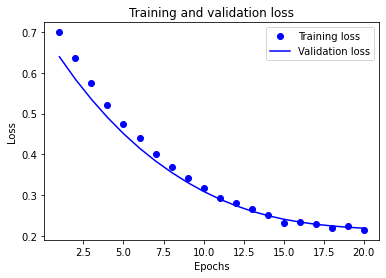

In [218]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

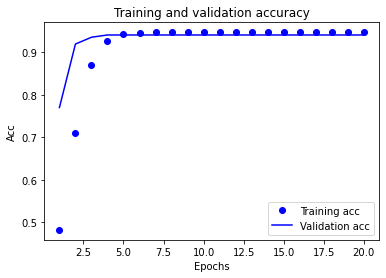

In [219]:
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [220]:
df3= pd.DataFrame(y_pred,y_test)
df3
df3.to_csv("out_result.csv")

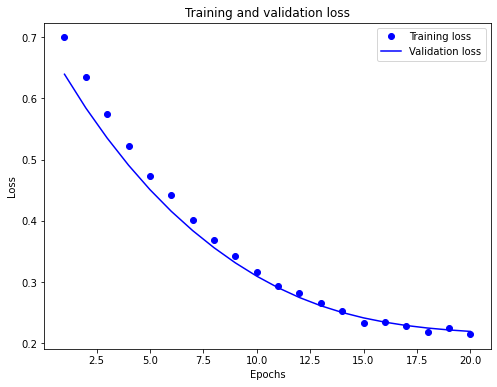

In [221]:
#画 epoch_loss 图 
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, loss_values, 'bo', label = 'Training loss') 
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']

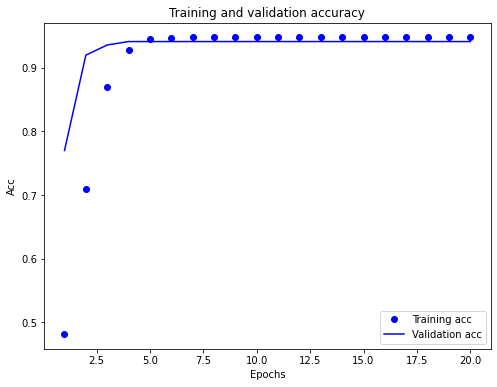

In [222]:
#画 epoc_acc 图 
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, acc_values, 'bo', label = 'Training acc') 
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Acc') 
plt.legend() 
plt.show()

In [223]:
#导出预测 result 和实际 result 导出 loss_acc 表导出训练集、测试集 
Df1= pd.DataFrame(y_pred,y_test) 
Df1.to_csv("out_result1.csv") 
print(pd.DataFrame(history_dict))
Df2=pd.DataFrame(history_dict) 
Df2.to_csv("loss_acc1.csv") 

train1,test1= train_test_split(data,test_size=0.20,random_state=10) 
Df3= pd.DataFrame(test1) 
Df3.to_csv("out_test.csv") 
Df4= pd.DataFrame(train1) 
Df4.to_csv("out_train.csv")

        loss  accuracy  val_loss  val_accuracy
0   0.699194  0.481548  0.639194      0.770053
1   0.634994  0.710119  0.584094      0.919786
2   0.574550  0.869643  0.534981      0.935829
3   0.521437  0.927381  0.490721      0.941176
4   0.473850  0.944643  0.450944      0.941176
5   0.441449  0.946429  0.415534      0.941176
6   0.401861  0.947619  0.384103      0.941176
7   0.368206  0.947619  0.356171      0.941176
8   0.341866  0.947619  0.331426      0.941176
9   0.317020  0.947619  0.309712      0.941176
10  0.294240  0.947619  0.290883      0.941176
11  0.281985  0.947619  0.274865      0.941176
12  0.266211  0.947619  0.261449      0.941176
13  0.252704  0.947619  0.250483      0.941176
14  0.232820  0.947619  0.241656      0.941176
15  0.234310  0.947619  0.234677      0.941176
16  0.228668  0.947619  0.229221      0.941176
17  0.219190  0.947619  0.225076      0.941176
18  0.224434  0.947619  0.221958      0.941176
19  0.215382  0.947619  0.219578      0.941176
